In [8]:
import os
import scipy as sp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants

#### Define Working Directory

In [20]:
print("Current Working Directory " , os.getcwd())
#Uncomment the following line and write the directory you want to save the files
os.chdir("/Users/kritop/Documents/ΥΠΟΛΟΓΙΣΤΙΚΗ/molecular/project4")
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/kritop/Documents/ΥΠΟΛΟΓΙΣΤΙΚΗ/molecular/project4
Current Working Directory  /Users/kritop/Documents/ΥΠΟΛΟΓΙΣΤΙΚΗ/molecular/project4


#### Create a series of structures (data files) for different lattice constants
##### The script below creates  supercells with the three primitive vectors orthogonal. This solves the problem encountered in lammpes with the skew supercells.

In [24]:
ar=np.arange(2.5,2.9,0.05)

for a in ar:
    A0=np.array([[a,0,0],[0,a,0],[0,0,a]])
# diamond    
    #basis=[[0.125,0.125,0.125],[0.625,0.625,0.125],[0.625,0.125,0.625],[0.875,0.375,0.375],[0.125,0.625,0.625],[0.375,0.875,0.375],[0.375,0.375,0.875],[0.875,0.875,0.875]]
# sc
    basis=[[0.,0.,0.]]
# bcc
    #basis=[[0.,0.,0.],[0.5,0.5,0.5]]
# fcc
    #basis=[[0.,0.,0.],[0.5,0.5,0.0],[0.5,0.0,0.5],[0.0,0.5,0.5]]
    x=np.zeros((np.shape(basis)[0],3))
    for i in range(np.shape(basis)[0]):
        x[i]=np.dot(basis[i],np.transpose(A0))
    filename='Ge'+str(f'{a:1.2f}')+'.sc.data'   
    with open(filename, 'w') as f:
        f.write('#Lammps Data File')
        f.write('\n')
        f.write('\n')
        lines = [str(np.shape(basis)[0]),' atoms']
        for l in lines:
            f.write(l)
        f.write('\n')
        f.write('1 atom types')
        f.write('\n')
        f.write('\n')
        lines = ['0.0 ',str(a),' xlo xhi']
        for l in lines:
            f.write(l)
        f.write('\n')
        lines = ['0.0 ',str(a),' ylo yhi']
        for l in lines:
            f.write(l)
        f.write('\n')
        lines = ['0.0 ',str(a),' zlo zhi']
        for l in lines:
            f.write(l)
        f.write('\n')
        f.write('\n')
        f.write('Masses')
        f.write('\n')
        f.write('\n')
        f.write('1 28.0855 #Si')
        f.write('\n')
        f.write('\n')
        f.write('Atoms # atomic')
        f.write('\n')
        f.write('\n')
        for j in np.arange(np.shape(basis)[0]):
            lines=[str(j+1),' 1 ',str(x[j][0]),' ',str(x[j][1]),' ',str(x[j][2])]
            for l in lines:
                f.write(l)
            f.write('\n')
    f.close()

#### Murnaghan Fit

In [11]:
def murn(v,v0,e0,b0,bP):
    nrg=e0+b0*v/(bP*(bP-1))*(bP*(1-v0/v)+(v0/v)**bP-1)
    return nrg
ev2J=constants.physical_constants['electron volt-joule relationship'][0]

#### Read Volume vs Energy data (Volume in $Angstrom^3$, Energy in eV)

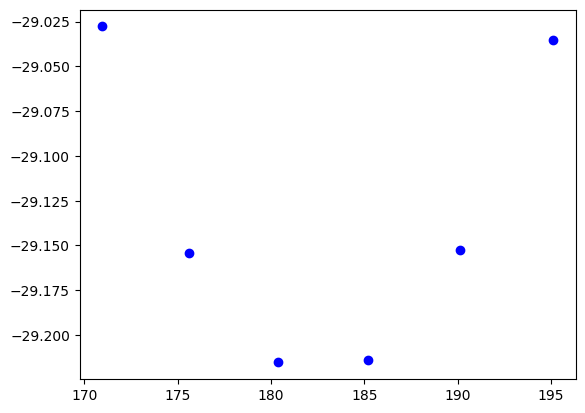

In [12]:
v,nrg = np.loadtxt('murn.in',dtype='float',unpack=True)
plt.scatter(v,nrg,color='blue')
plt.show()

In [13]:
popt, pcov = curve_fit(murn, v, nrg,[18,-3.55,70,1.1])
print('Bulk Modulus in GPa=',(popt[2]*ev2J/1E-30)/1E9)

Bulk Modulus in GPa= 76.51509749131932


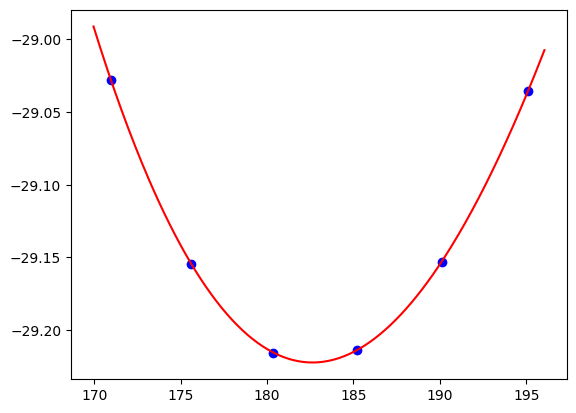

In [14]:
plt.scatter(v,nrg,color='blue')
vout=np.arange(v[0]-1,v[-1]+1,0.1)
nrgOut=murn(vout,popt[0],popt[1],popt[2],popt[3])
plt.plot(vout,nrgOut,color='red')
plt.show()

In [15]:
print('V0=',popt[0],'E0=',popt[1],'B=',popt[2])

V0= 182.63071522289752 E0= -29.222190177191024 B= 0.47756967532531946
